## A Descriptive Analysis of Online Food Delivery Service Markets in European Countries

Customers who pay significantly more than what they would do in a restaurant, core employees who have to accept limited financial security and rushing through the streets under terrible weather conditions, pushing the limit of the traffic rules for a slightly better pay than that of a secure job.

Can we find variables, that are good predictors of how prevalent are the online food services in european countries?

To measure how prevalent online food services are, i will use the eurostat data for the percentage of people said yes to the question "have you used online food services in the last 3 months?" in the survey. The explanatory variables were taken from wbdata, eurostat, and the european commission.

### Description of the variables

**food (target):** people said yes to the question "have you used online food services in the last 3 months?" (%)

**urban_share:** population living in areas classified as urban (%)

**gdp_pc_ppp:** GDP per capita (PPP)

**int:** people who used the internet at least once in the last 3 months (%)

**total male img in 5y (per 100 people):** male immigrant inflow in last 5 years per 100 people

**eatout_share:** expenditure on restaurants & catering / total household consumption (%)

**fuel_norm:** annual averages of weekly, tax-inclusive Euro-super 95 (E5) gasoline pump prices (€/liter) (inflated using CPI, base year = 2024)

### Supply and demand analysis of the variables


***Supply Side***

**urban_share:** urbanization may imply cost advantages in delivery services by increasing population density, reducing delivery distances, in turn improving logistical efficiency

**total male img in 5y (per 100 people):** it may capture a substantial labor supply increase

**fuel_norm:** it can show the effect of changing transportation costs

***Demand Side***

**gdp_pc_ppp:** to investigate the income effect, and to control for other variables

**int:** a necessary condition for consumers to access online services

**eatout_share:** to capture the consumer preferences and lifestyle in the culture

### Let's download and format the data,

eurostat data

In [60]:
import pandas as pd
import numpy as np
import eurostat

In [61]:
df = eurostat.get_data_df(
    "isoc_ec_ibgs",
    flags=False
)

food_df = df[(df["ind_type"] == "IND_TOTAL") & (df["indic_is"] == "I_BFDR") & (df["unit"] == "PC_IND_BUY3")]
food_df = food_df.drop(columns = ["freq", "ind_type", "indic_is", "unit", "2025"])
food_df = food_df.rename(columns = {"geo\TIME_PERIOD" : "country"})
food_df = food_df.drop(index = 301061)
food_df.head()

<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Yiğit\AppData\Local\Temp\ipykernel_13788\1920205921.py:8: SyntaxWarning: invalid escape sequence '\T'
  food_df = food_df.rename(columns = {"geo\TIME_PERIOD" : "country"})


,country,2020,2021,2022,2023,2024
301047,AL,5.82,12.81,26.53,40.22,59.70
301048,AT,29.13,46.41,37.32,34.97,36.23
301049,BA,10.95,13.21,NaN,20.99,10.02
301050,BE,25.59,36.15,29.73,30.52,29.52
301051,BG,15.92,18.92,26.52,26.94,31.98


In [62]:
df2 = eurostat.get_data_df(
    "isoc_ci_ifp_iu",
    flags=False
)

int_df = df2[(df2["ind_type"] == "IND_TOTAL") & (df2["indic_is"] == "I_IU3") & (df2["unit"] == "PC_IND")]
int_df = int_df.drop(columns = ["freq", "ind_type", "indic_is", "unit"])
int_df = int_df.rename(columns = {"geo\TIME_PERIOD" : "country"})
int_df = int_df.drop(index = range(27461, 27466))
int_df = int_df[["country", "2020", "2021", "2022", "2023", "2024"]]
int_df.head()

<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Yiğit\AppData\Local\Temp\ipykernel_13788\1634532607.py:8: SyntaxWarning: invalid escape sequence '\T'
  int_df = int_df.rename(columns = {"geo\TIME_PERIOD" : "country"})


,country,2020,2021,2022,2023,2024
27447,AL,72.24,79.37,82.66,83.14,86.18
27448,AT,87.53,92.53,93.61,95.33,94.92
27449,BA,73.21,75.68,NaN,83.38,86.10
27450,BE,91.53,92.79,94.01,94.63,95.78
27451,BG,70.16,75.27,79.13,80.39,82.44


In [63]:
df3 = eurostat.get_data_df(
    "migr_imm1ctz",
    flags=False
)

immig = df3[(df3["age"] == "TOTAL") & (df3["agedef"] == "COMPLET") & (df3["sex"] == "M") & (df3["citizen"] == "TOTAL")]
immig = immig.drop(columns = ["freq", "citizen", "agedef", "age", "unit", "sex"])
immig = immig.rename(columns = {"geo\TIME_PERIOD" : "country"})
immig = immig.drop(index = 988879)

<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Yiğit\AppData\Local\Temp\ipykernel_13788\3494839590.py:8: SyntaxWarning: invalid escape sequence '\T'
  immig = immig.rename(columns = {"geo\TIME_PERIOD" : "country"})


In [64]:
df4 = eurostat.get_data_df(
    "demo_pjan",
    flags=False
)

pop = df4[(df4["age"] == "TOTAL") & (df4["sex"] == "T")]
pop = pop.drop(columns = ["freq", "age", "unit", "sex"])
pop = pop.rename(columns = {"geo\TIME_PERIOD" : "country"})
pop.head()

<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Yiğit\AppData\Local\Temp\ipykernel_13788\3441423352.py:8: SyntaxWarning: invalid escape sequence '\T'
  pop = pop.rename(columns = {"geo\TIME_PERIOD" : "country"})


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
118,AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76177.0,NaN,NaN,NaN,NaN,NaN
119,AL,1583800.0,1633800.0,1685800.0,1736838.0,1788404.0,1839866.0,1889715.0,1939430.0,1991765.0,...,2885796.0,2875592.0,2876591.0,2870324.0,2862427.0,2845955.0,2829741.0,2793592.0,2761785.0,NaN
120,AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3010598.0,2998577.0,2986151.0,2972732.0,2965269.0,2959694.0,2963251.0,NaN,2977130.0,2991201.0
121,AT,7030385.0,7064693.0,7107904.0,7151824.0,7199798.0,7247804.0,7293973.0,7350159.0,7403837.0,...,8584926.0,8700471.0,8772865.0,8822267.0,8858775.0,8901064.0,8932664.0,8978929.0,9104772.0,9158750.0
122,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9593038.0,9705643.0,9809981.0,9898085.0,9981457.0,10067108.0,10119133.0,10156366.0,10127145.0,10180770.0


In [65]:
img_df = immig[["country"]].copy()
for i in range(2020, 2025):
    img_df[f"{i}"] = immig[[f"{i - 5}", f"{i - 4}", f"{i - 3}", f"{i - 2}", f"{i - 1}"]].sum(axis = 1)

In [66]:
img_div_pop = (img_df.set_index("country") / pop.set_index("country")).dropna(how = "all").dropna(axis=1, how="all")
img_div_pop = img_div_pop*100
img_div_pop = img_div_pop.reset_index()
img_div_pop.head()

,country,2020,2021,2022,2023,2024
0,AT,3.830609,3.362894,3.321075,3.720203,3.949524
1,BE,3.253651,3.080581,3.150903,3.454228,3.579467
2,BG,1.074396,1.171565,1.347416,1.510738,1.758224
3,CH,4.475268,4.366331,4.317371,4.449448,5.038362
4,CY,5.938528,6.325808,6.491862,7.261423,7.815784


In [67]:
#Converting eurostat data into panel data
food_panel = pd.melt(
    food_df,
    id_vars = "country",     
    value_vars = ["2020","2021","2022","2023","2024"],   
    var_name = "date",     
    value_name= "food"    
)
int_panel = pd.melt(
    int_df,
    id_vars = "country",      
    value_vars = ["2020","2021","2022","2023","2024"],   
    var_name = "date",    
    value_name= "int"    
)
img_panel = pd.melt(
    img_div_pop,
    id_vars = "country",   
    value_vars = ["2020","2021","2022","2023","2024"],  
    var_name = "date",   
    value_name= "total male img in 5y"   
)

Now, wbdata

In [68]:
!pip install wbdata

In [69]:
import wbdata
import datetime

dates = (
    datetime.datetime(2019, 1, 1),
    datetime.datetime(2025, 1, 1)
)

data = wbdata.get_dataframe(
    {
        "SP.URB.TOTL.IN.ZS": "urban_share",
        "NY.GDP.PCAP.PP.KD": "gdp_pc_ppp"
    },
    date=dates
)
data = data.reset_index()

In [70]:
#replacing the country codes in wbdata with the ones in eurostat
country_to_iso2 = {
    "Albania": "AL",
    "Austria": "AT",
    "Bosnia and Herzegovina": "BA",
    "Belgium": "BE",
    "Bulgaria": "BG",
    "Switzerland": "CH",
    "Cyprus": "CY",
    "Czechia": "CZ",
    "Germany": "DE",
    "Denmark": "DK",
    "Estonia": "EE",
    "Greece": "EL",
    "Spain": "ES",
    "Finland": "FI",
    "France": "FR",
    "Croatia": "HR",
    "Hungary": "HU",
    "Ireland": "IE",
    "Iceland": "IS",
    "Italy": "IT",
    "Lithuania": "LT",
    "Luxembourg": "LU",
    "Latvia": "LV",
    "Montenegro": "ME",
    "North Macedonia": "MK",
    "Malta": "MT",
    "Netherlands": "NL",
    "Norway": "NO",
    "Poland": "PL",
    "Portugal": "PT",
    "Romania": "RO",
    "Serbia": "RS",
    "Sweden": "SE",
    "Slovenia": "SI",
    "Slovak Republic": "SK",
    "Turkiye": "TR",
    "United Kingdom": "UK",
    "Kosovo": "XK"}

In [71]:
data["country"] = data["country"].map(country_to_iso2)
data = data[data["country"].notna()].copy()
data.head()

,country,date,urban_share,gdp_pc_ppp
300,AL,2024,58.546363,21641.053150
301,AL,2023,58.210609,20481.016749
302,AL,2022,57.864348,19388.855060
303,AL,2021,57.507719,18212.853270
304,AL,2020,57.140859,16457.771884


Third party data

In [72]:
!pip install openpyxl

In [93]:
fuel = pd.read_excel("https://raw.githubusercontent.com/yigittakimcilar/my-projects/3c785ddd2c589530b8f21a0dc4053fb2a8d5512a/online%20food%20services/data/Weekly_Oil_Bulletin_Prices_History.xlsx")
fuel.head()

#convert into panel data
fuel_panel = pd.melt(
    fuel,
    id_vars = "date",         
    var_name = "country",    
    value_name= "fuel_prices"    
)
# delete the day and month specification
fuel_panel["date"] = fuel_panel["date"].dt.year

#take the average of the weekly prices in each year to find the average yearly price
annual_prices = (
    fuel_panel
    .groupby(["country", "date"], as_index=False)["fuel_prices"]
    .mean()
)
annual_prices.head()

,country,date,fuel_prices
0,AT,2005,1033.530612
1,AT,2006,1091.795918
2,AT,2007,1121.244898
3,AT,2008,1215.693878
4,AT,2009,1044.860000


In [94]:
eatout_share = pd.read_csv("https://raw.githubusercontent.com/yigittakimcilar/my-projects/3c785ddd2c589530b8f21a0dc4053fb2a8d5512a/online%20food%20services/data/nama_10_cp18_page_linear_2_0.csv")
eatout_share = eatout_share[["geo", "TIME_PERIOD", "OBS_VALUE"]].rename(
    columns={
        "geo": "country",
        "TIME_PERIOD": "date",
        "OBS_VALUE": "eatout_share"
    }
)
eatout_share.head()

,country,date,eatout_share
0,AT,2019,9.9
1,AT,2020,7.4
2,AT,2021,6.3
3,AT,2022,9.0
4,AT,2023,9.5


Merge all the data in one dataframe

In [75]:
our_dfs = [food_panel, int_panel, img_panel, data, annual_prices, eatout_share]
for i in our_dfs:
    i["date"] = i["date"].astype(int)

In [76]:
df_merged = (
    data
    .merge(food_panel, on=["country", "date"], how="inner")
    .merge(int_panel, on=["country", "date"], how="inner")
    .merge(img_panel, on=["country", "date"], how="inner")
    .merge(annual_prices, on=["country", "date"], how="inner")
    .merge(eatout_share, on=["country", "date"], how="inner")
)
df_merged.head()

,country,date,urban_share,gdp_pc_ppp,food,int,total male img in 5y,fuel_prices,eatout_share
0,AT,2024,69.465818,63788.078678,36.23,94.92,3.949524,1568.245283,9.6
1,AT,2023,69.226536,64536.298184,34.97,95.33,3.720203,1595.411765,9.5
2,AT,2022,68.998085,65694.551329,37.32,93.61,3.321075,1727.705882,9.0
3,AT,2021,68.773602,62968.942231,46.41,92.53,3.362894,1283.367347,6.3
4,AT,2020,68.541018,60276.415346,29.13,87.53,3.830609,1083.680000,7.4


In [77]:
# For the column fuel_prices, convert nominal EUR values to real 2023 EUR using CPI


def norm_eur(row):
    if row["date"] == 2020:
        return row["fuel_prices"]*(1.22)
    if row["date"] == 2021:
        return row["fuel_prices"]*(1.19)
    if row["date"] == 2022:
        return row["fuel_prices"]*(1.09)
    if row["date"] == 2023:
        return row["fuel_prices"]*(1.02)
    else:
        return row["fuel_prices"]

df_merged["fuel_norm"] = df_merged.apply(norm_eur, axis=1)
df_merged["fuel_norm"] = df_merged["fuel_norm"]/1000
df_merged = df_merged.drop(columns = "fuel_prices")
df_merged.head()

,country,date,urban_share,gdp_pc_ppp,food,int,total male img in 5y,eatout_share,fuel_norm
0,AT,2024,69.465818,63788.078678,36.23,94.92,3.949524,9.6,1.568245
1,AT,2023,69.226536,64536.298184,34.97,95.33,3.720203,9.5,1.627320
2,AT,2022,68.998085,65694.551329,37.32,93.61,3.321075,9.0,1.883199
3,AT,2021,68.773602,62968.942231,46.41,92.53,3.362894,6.3,1.527207
4,AT,2020,68.541018,60276.415346,29.13,87.53,3.830609,7.4,1.322090


In [78]:
df_merged = df_merged.set_index(["country", "date"])


In [79]:
print(f"The shape of out dataframe is {df_merged.shape}")

The shape of out dataframe is (130, 7)


In [80]:
#Count of NA values
df_merged.isna().sum()

urban_share             0
gdp_pc_ppp              0
food                    1
int                     1
total male img in 5y    0
eatout_share            0
fuel_norm               0
dtype: int64

### Describing our Variables

In [81]:
#Descriptive statistics of our variables
df_merged.describe()

,urban_share,gdp_pc_ppp,food,int,total male img in 5y,eatout_share,fuel_norm
count,130.000000,130.000000,129.000000,129.000000,130.000000,130.000000,130.000000
mean,72.890302,55200.382320,35.215116,90.679535,3.669868,6.227692,1.665092
std,12.769753,22609.275289,14.816615,5.773414,2.866041,2.662458,0.243220
min,52.163483,28521.403696,12.400000,70.160000,0.304036,1.600000,1.136051
25%,63.947821,41062.403875,24.840000,87.530000,1.872971,4.600000,1.480153
50%,70.292018,48184.044245,31.980000,91.310000,2.999023,5.700000,1.639218
75%,81.748236,62637.519221,41.170000,94.520000,4.112610,7.375000,1.846741
max,95.654626,136772.443753,81.670000,99.770000,15.578861,14.700000,2.298404


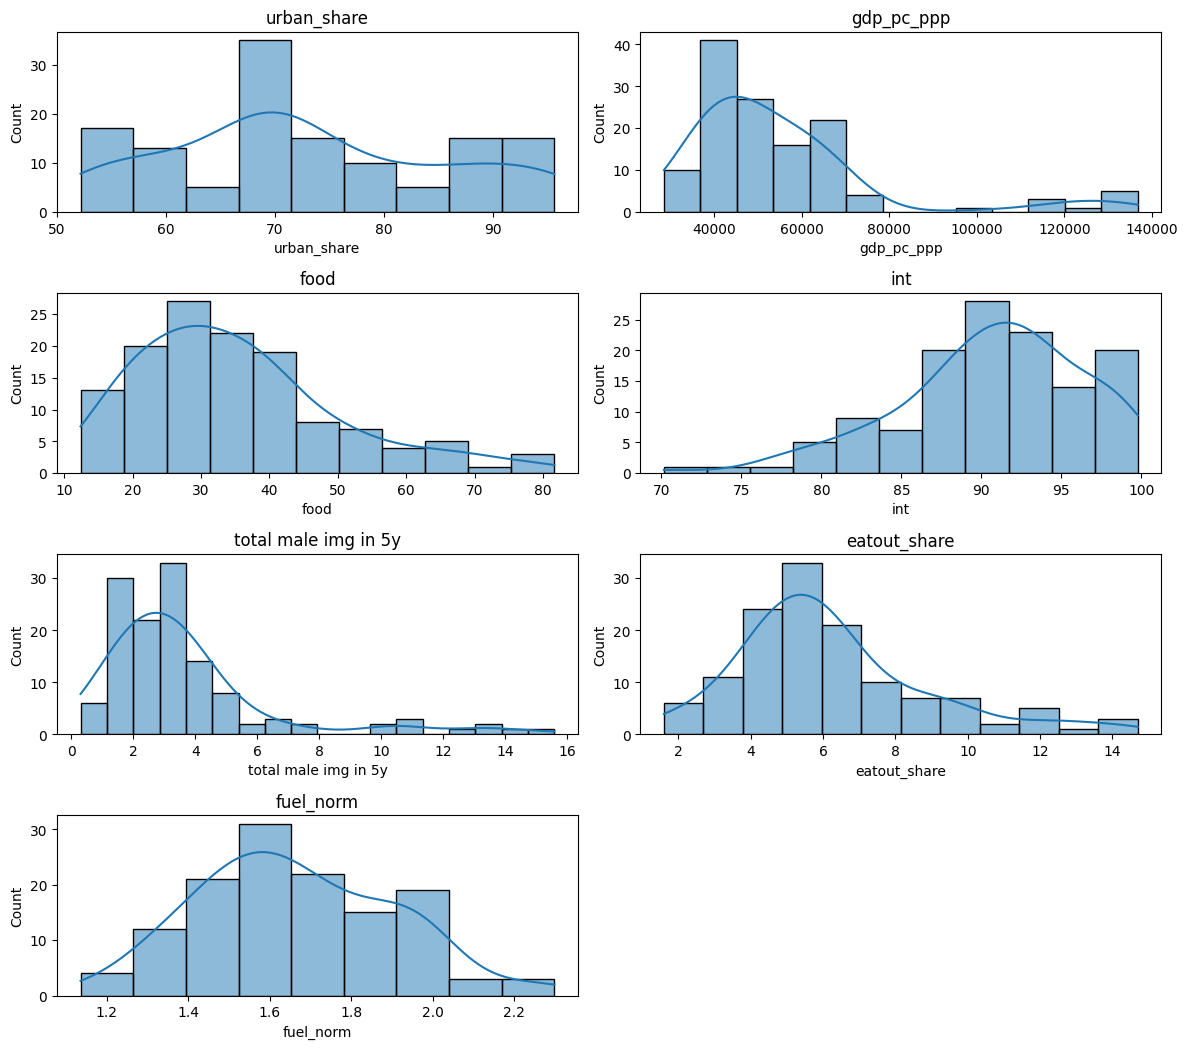

In [82]:
#Estimated distribution of our variables

import matplotlib.pyplot as plt
import seaborn as sns

pos = 1
fig = plt.figure(figsize=(12, 18))

cols = (
    df_merged
    .select_dtypes(include="number")
    .columns
)

for col in cols:
    ax = fig.add_subplot(7, 2, pos)
    pos += 1
    sns.histplot(df_merged[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

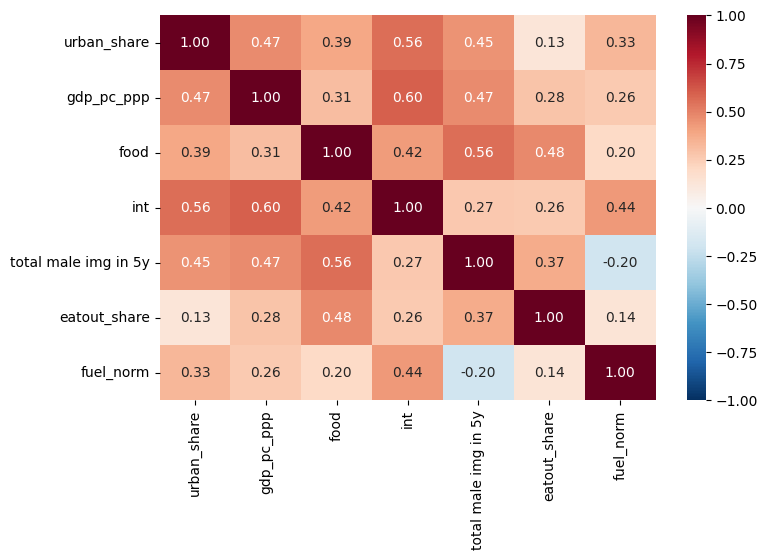

In [83]:
#Correlation Matrix
corr_figure = df_merged.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(
    corr_figure,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    vmin=-1,
    vmax=1
)
plt.show()

## Regression

In [84]:
#Cleaning the NAs, and adding the year dummies
df_clean = df_merged.dropna()
df_clean = df_clean.reset_index()
year_dummies = pd.get_dummies(df_clean["date"], prefix="y", drop_first=True)
year_dummies = year_dummies.astype(int)
df_reg = pd.concat([df_clean, year_dummies], axis=1)
df_reg = df_reg.set_index(["country", "date"])
df_reg.head()

urban_share    gdp_pc_ppp   food    int  total male img in 5y  \
country date                                                                  
AT      2024    69.465818  63788.078678  36.23  94.92              3.949524   
        2023    69.226536  64536.298184  34.97  95.33              3.720203   
        2022    68.998085  65694.551329  37.32  93.61              3.321075   
        2021    68.773602  62968.942231  46.41  92.53              3.362894   
        2020    68.541018  60276.415346  29.13  87.53              3.830609   

              eatout_share  fuel_norm  y_2021  y_2022  y_2023  y_2024  
country date                                                           
AT      2024           9.6   1.568245       0       0       0       1  
        2023           9.5   1.627320       0       0       1       0  
        2022           9.0   1.883199       0       1       0       0  
        2021           6.3   1.527207       1       0       0       0  
        2020           7.4   1.322090       0       0       0       0

In [85]:
import statsmodels.api as sm

x = df_reg.drop(columns = "food")
y = df_reg["food"]

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   food   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     13.37
Date:                Sat, 27 Dec 2025   Prob (F-statistic):           1.95e-15
Time:                        13:11:50   Log-Likelihood:                -481.43
No. Observations:                 129   AIC:                             984.9
Df Residuals:                     118   BIC:                             1016.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -64.0691 

In [86]:
#Displaying the p-values
model.pvalues

const                   4.350932e-04
urban_share             7.635949e-01
gdp_pc_ppp              3.911912e-03
int                     3.915971e-03
total male img in 5y    2.054061e-08
eatout_share            2.311513e-04
fuel_norm               1.842776e-02
y_2021                  3.671536e-01
y_2022                  4.972219e-01
y_2023                  3.829818e-01
y_2024                  3.949059e-01
dtype: float64

In [88]:
#Displaying the coefficients
model.params

const                  -64.069101
urban_share             -0.031865
gdp_pc_ppp              -0.000170
int                      0.732651
total male img in 5y     2.982308
eatout_share             1.549494
fuel_norm               15.013229
y_2021                   2.882300
y_2022                  -2.575964
y_2023                  -2.867793
y_2024                  -2.808876
dtype: float64

### Interpretation of the Regression Coefficients

 Other than urban_share, our coefficients are highly statistically significant. For int and eatout_share 1 pp increase is associated with respectively 0.73 and .155 pp increase in online food services usage.

 A five-year male immigrant inflow equivalent to 1% of the population is associated with an 2.98 pp higher share of individuals using online food services, ceteris paribus.

 An increase of 10 cents in the liter prices of gasoline is associated with a 1.55 pp increase in online food services usage, which is in the unexpected direction. This may be because the effect of a change in fuel prices is hard to isolate, because it also effects the alternative consumption bundles like driving to a restaurant. Because the variation in fuel prices of the countries in our data set mostly caused by the tax policy, there might be a relation with green tax policies and online food services usage.

 For gdp_pc_ppp an increase of 10000 EUR is associated with a 1.7 pp decrease in online food services usage, which is also in the unexpected direction.

 

**Thank you for your attention :)**


**Yiğit Takımcılar**